In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

block_plot=False
plt.style.use('ggplot')

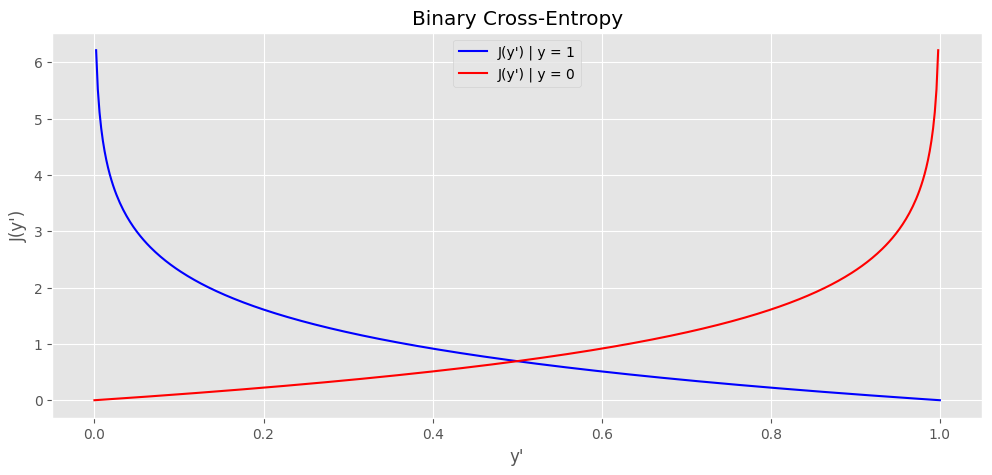

In [2]:
# Cross entropy plot y =1
plt.rcParams["figure.figsize"] = (12, 5)
x = tf.linspace(0, 1, 500)
y1 = -tf.math.log(x)
y0 = -tf.math.log(1 - x)

plt.figure
plt.plot(x, y1, color="b", label="J(y') | y = 1")
plt.plot(x, y0, color="r", label="J(y') | y = 0")
plt.xlabel("y'")
plt.ylabel("J(y')")
plt.legend(loc="upper center")
plt.title("Binary Cross-Entropy")
plt.show(block=block_plot)
plt.close()

In [3]:
# Binary cross entropy loss
def binary_crossentropy(y_true, y_pred):
    # Convert ground truth and predictions to Tensor.
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)
    loss = -(
        (1.0 - y_true) * tf.math.log(1.0 - y_pred)) \
        - (y_true * tf.math.log(y_pred)
    )
    loss = tf.reduce_mean(loss)
    return loss

In [4]:
# Ground truth of a sample where the label is positive.
# Batch size is 1 and number of samples is 1.
y_true = [[1.]]
# The prediction close to 1 so the loss would be close to 0.
y_pred = [[0.95]]
bce_loss = binary_crossentropy(y_true, y_pred)
print(bce_loss.numpy())

0.051293306


In [5]:
# Ground truth of a sample where the label is positive.
y_true = [[1.0]]
# The prediction is much cloder to 0 this time.
y_pred = [[0.05]]
bce_loss = binary_crossentropy(y_true, y_pred)
print(bce_loss.numpy())

2.9957323


In [6]:
# Ground truth of a sample where the label is positive.
y_true = [[0.0]]
# The prediction is 0.06
y_pred = [[0.06]]
bce_loss = binary_crossentropy(y_true, y_pred)
print(bce_loss.numpy())

0.061875407


In [8]:
# Categorical Cross Entropy Loss
def categorical_crossentropy(y_true, y_pred):
    # Convert ground truth and predictions to Tensors.
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    loss = -(y_true*tf.math.log(y_pred))
    flattened_loss = tf.reshape(loss, -1)
    final_loss = [i for i in flattened_loss if i != 0]
    final_loss = sum(final_loss)/len(final_loss)
    return final_loss

In [9]:
y_true = [[1.0, 0, 0]]
y_pred = [[0.90, 0.05, 0.05]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

0.105360545


In [10]:
# Sample belongs to class 0.
y_true = [[1.0, 0, 0]]
# Model predicted it as class 1.
y_pred = [[0.025, 0.95, 0.025]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

3.6888795


In [11]:
# Sample belongs to class 1.
y_true = [[0, 1.0, 0]]
# Prediction is correct, but model is not very confident.
y_pred = [[0.3, 0.40, 0.3]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

0.9162907


In [12]:
# Sample belongs to class 1.
y_true = [[0, 1.0, 0]]
# The model predicted all classes with euqal confidence.
y_pred = [[0.333, 0.333, 0.333]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

1.0996128


In [13]:
# Sparse Categrical Cross Entropy Loss
def sparse_categorical_crossentropy(y_true, y_pred):
    num_samples = len(y_true)
    loss = []
    # Loop over the number of samples.
    for i in range(num_samples):
        y_pred_sample = y_pred[i] # The current prediction.
        y_true_sample = y_true[i] # The current ground-truth.

        # Loss for current iteration.
        iter_loss = -tf.math.log(y_pred_sample[y_true_sample])

        # Append sampe_loss to the loss list
        loss.append(iter_loss)

    loss = tf.reduce_mean(loss)
    return loss

In [14]:
y_true = [0]
y_pred = [[0.90, 0.05, 0.05]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

0.105360545


In [15]:
# Sample belongs to class 0.
y_true = [0]
# Model predicted it as class 1.
y_pred = [[0.025, 0.95, 0.025]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

3.6888795


In [16]:
# Sample belongs to class 1.
y_true = [1]
# Prediction is correct, but model is not very confident.
y_pred = [[0.3, 0.40, 0.3]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

0.9162907


In [17]:
# Sample belongs to class 1.
y_true = [1]
# Prediction is correct, but model is not very confident.
y_pred = [[0.333, 0.333, 0.333]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

1.0996128


In [18]:
# Keras Binary Cross Entropy Loss
y_true = [[1.]]
y_pred = [[0.95]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Binary Cross Entropy
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_loss = bce(y_true, y_pred)
print(bce_loss.numpy())

0.051293306


In [19]:
# Keras Categorical Cross Entropy Loss
# Prediction values replicate logits from the last layer of the neural network.
y_true = [[1.0, 0, 0]]
y_pred = [[12., 5., 7.]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
cce_loss = cce(y_true, y_pred)
print(cce_loss.numpy())

0.007620668


In [20]:
y_true = [[1.0, 0, 0]]
# The following are the softmax prediction values of [[12., 5., 7.]]
y_pred = [[0.99240828, 0.00090495922, 0.0066867946]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_loss = cce(y_true, y_pred)
print(cce_loss.numpy())

0.007620688


In [21]:
y_true = [[1.0, 0, 0]]
y_pred = [[0.90, 0.05, 0.05]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_loss = cce(y_true, y_pred)
print(cce_loss.numpy())

0.105360545


In [22]:
# Keras Sparse Categorical Cross Entropy Loss
y_true = [0]
y_pred = [[0.90, 0.05, 0.05]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)


# Sparse Categorical Cross Entropy
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
scce_loss = scce(y_true, y_pred)
print(scce_loss.numpy())

0.10536056
